<a href="https://colab.research.google.com/github/priyaelsa/CodeClause_Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
#Importing required libraries
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

#Importing ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

#Importing stemming Library
from nltk.stem import PorterStemmer

#Library to form wordcloud
from wordcloud import wordcloud, ImageColorGenerator
import requests
from PIL import Image

#Library to Plot
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("popular")
nltk.download('stopwords')

#Global parameters
stopwords = set(stopwords.words('english'))


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [209]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [210]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [212]:
#! cp kaggle.json ~/.kaggle/

In [213]:
!cp /content/drive/MyDrive/Colab\ Notebooks/kaggle\ \(1\).json ~/.kaggle/kaggle.json


In [214]:
! chmod 600 ~/.kaggle/kaggle.json


In [215]:
! kaggle datasets download -d abhi8923shriv/sentiment-analysis-dataset

sentiment-analysis-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [216]:
!unzip sentiment-analysis-dataset.zip

Archive:  sentiment-analysis-dataset.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test.csv                
  inflating: testdata.manual.2009.06.14.csv  
  inflating: train.csv               
  inflating: training.1600000.processed.noemoticon.csv  


In [218]:
df

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [220]:
df.isnull().sum()


textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [221]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

In [222]:
text_df = df.drop(['textID', 'selected_text', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'], axis=1)  #axis=1 indicates column
text_df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [223]:
# group the data based on the "sentiment" column
sentiment_count = df.groupby(['sentiment']).size()

print(sentiment_count)

sentiment
negative     7781
neutral     11118
positive     8582
dtype: int64


<Axes: xlabel='sentiment', ylabel='count'>

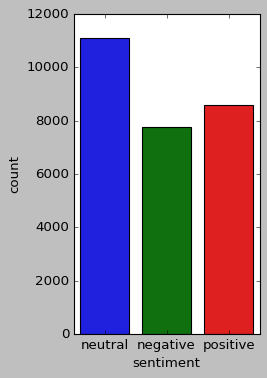

In [224]:
#countplot - Category of tweets based on its sentiment
fig = plt.figure(figsize=(3,5))
sns.countplot(x='sentiment',data = df)

Text(0.5, 1.0, 'Distribution of sentiments')

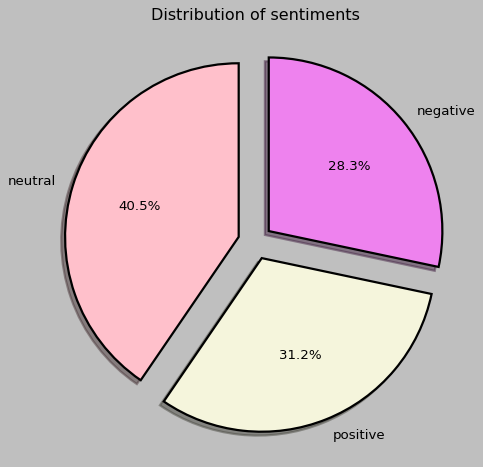

In [225]:
fig = plt.figure(figsize=(7,7))
colors = ("pink", "beige", "violet")
wp = {'linewidth':2, 'edgecolor': "black"}
tags = df['sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors, startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [226]:
pos_tweets = df.loc[df['sentiment'] == 'positive', ['text', 'sentiment']]
pos_tweets.head(8582)


,text,sentiment
6,2am feedings for the baby are fun when he is a...,positive
9,Journey!? Wow... u just became cooler. hehe....,positive
11,I really really like the song Love Story by Ta...,positive
21,Playing Ghost Online is really interesting. Th...,positive
25,"the free fillin` app on my ipod is fun, im add...",positive
...,...,...
27467,morning twit-friends! welcome to my new followers,positive
27474,So I get up early and I feel good about the da...,positive
27475,enjoy ur night,positive
27478,Yay good for both of you. Enjoy the break - y...,positive


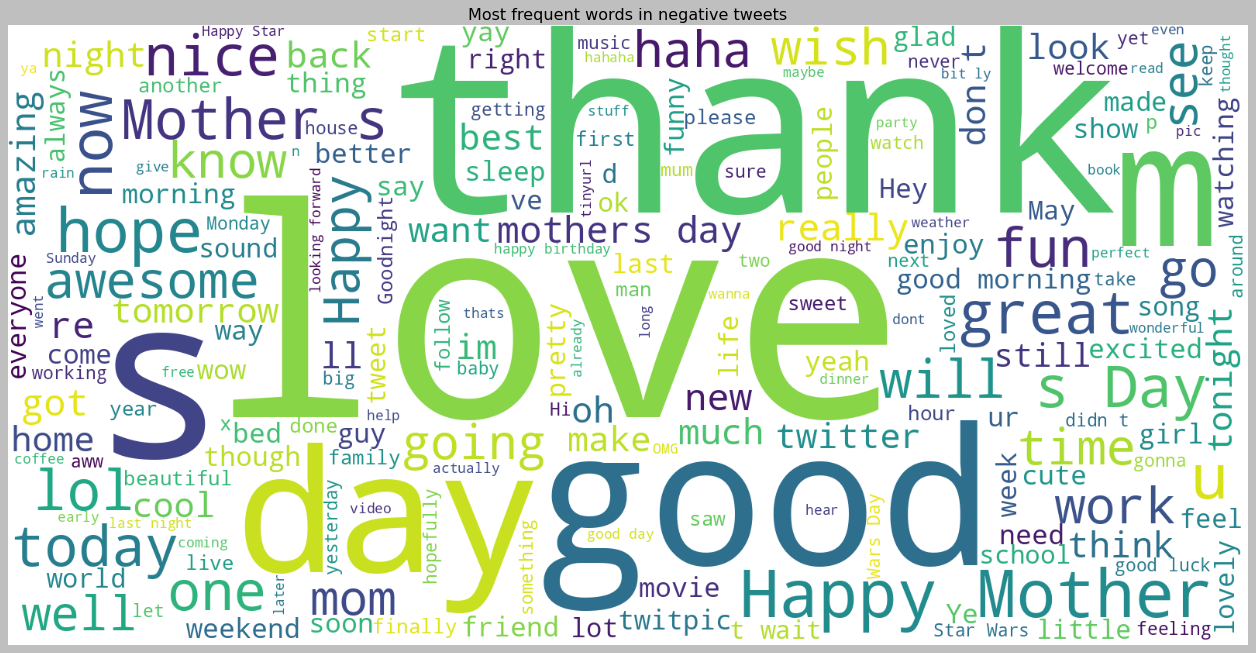

In [227]:
pos_tweets = df[df['sentiment'] == 'positive']
positive_text = pos_tweets['text']
positive_text_str = ' '.join(positive_text)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, height=800, background_color='white')
wordcloud.generate(positive_text_str)
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative tweets')
plt.show()




In [228]:
neg_tweets = df.loc[df['sentiment'] == 'negative', ['text', 'sentiment']]
neg_tweets.head(7781)


,text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
12,My Sharpie is running DANGERously low on ink,negative
...,...,...
27464,rec game....trying not to cry...the pain is to...,negative
27470,lol i know and haha..did you fall asleep?? o...,negative
27472,http://twitpic.com/663vr - Wanted to visit the...,negative
27476,wish we could come see u on Denver husband l...,negative


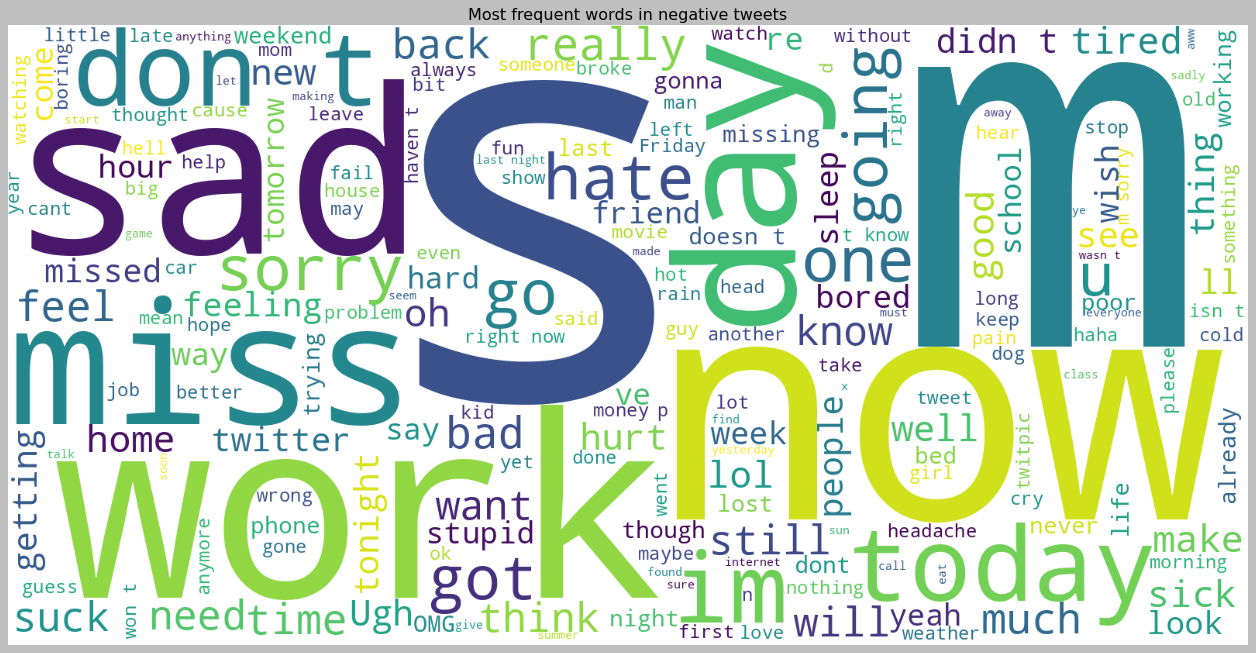

In [229]:
neg_tweets = df[df['sentiment'] == 'negative']
negative_text = neg_tweets['text']
negative_text_str = ' '.join(negative_text)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, height=800, background_color='white')
wordcloud.generate(negative_text_str)

plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative tweets')
plt.show()


In [230]:
neu_tweets = df.loc[df['sentiment'] == 'neutral', ['text', 'sentiment']]
neu_tweets.head(11118)


,text,sentiment
0,"I`d have responded, if I were going",neutral
5,http://www.dothebouncy.com/smf - some shameles...,neutral
7,Soooo high,neutral
8,Both of you,neutral
10,"as much as i love to be hopeful, i reckon the...",neutral
...,...,...
27468,"few grilled mushrooms and olives, feta cheese ...",neutral
27469,94 more days till BH comes back to LA,neutral
27471,"i`m defying gravity. and nobody in alll of oz,...",neutral
27473,in spoke to you yesterday and u didnt respond...,neutral


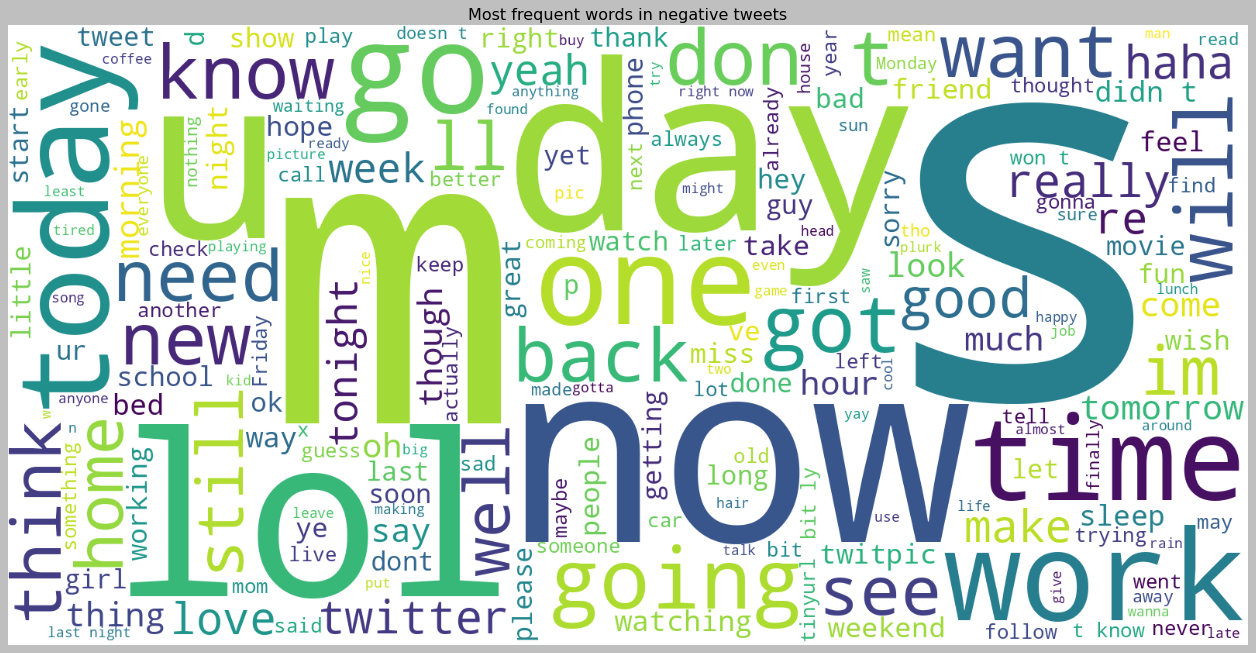

In [231]:
neu_tweets = df[df['sentiment'] == 'neutral']
neutral_text = neu_tweets['text'].astype(str).fillna('')
neutral_text_str = ' '.join(neutral_text)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, height=800, background_color='white')
wordcloud.generate(neutral_text_str)

plt.figure(figsize=(20, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative tweets')
plt.show()


In [232]:
# Replace NaN values with an empty string
text_df['text'] = text_df['text'].fillna('')

# Fit CountVectorizer on the 'text' column
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [233]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)


In [234]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [235]:
print("size of x_train:", (x_train.shape))
print("size of y_train:", (y_train.shape))
print("size of x_test:", (x_test.shape))
print("size of y_test:", (y_test.shape))

size of x_train: (21984, 179901)
size of y_train: (21984,)
size of x_test: (5497, 179901)
size of y_test: (5497,)


In [236]:
import warnings
warnings.filterwarnings('ignore')

In [254]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%". format(logreg_acc*100))

Test accuracy: 69.82%


In [238]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 974  518   70]
 [ 309 1651  270]
 [  61  431 1213]]


              precision    recall  f1-score   support

    negative       0.72      0.62      0.67      1562
     neutral       0.64      0.74      0.68      2230
    positive       0.78      0.71      0.74      1705

    accuracy                           0.70      5497
   macro avg       0.71      0.69      0.70      5497
weighted avg       0.71      0.70      0.70      5497



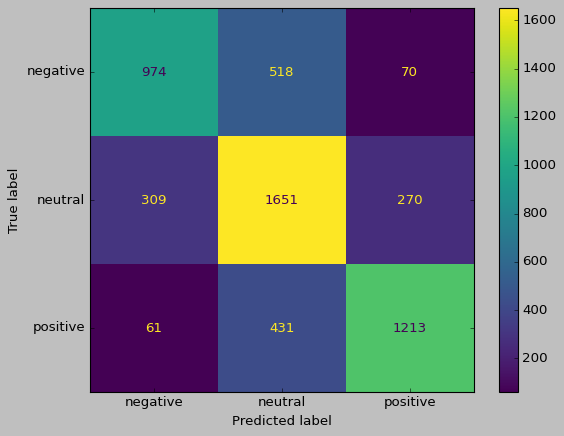

In [239]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()